<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Unsupervised-Learning" data-toc-modified-id="Unsupervised-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Unsupervised Learning</a></span><ul class="toc-item"><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>DBSCAN</a></span></li><li><span><a href="#KMeans" data-toc-modified-id="KMeans-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>KMeans</a></span></li><li><span><a href="#Agglomerative-Clustering(병합-군집화)" data-toc-modified-id="Agglomerative-Clustering(병합-군집화)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Agglomerative Clustering(병합 군집화)</a></span><ul class="toc-item"><li><span><a href="#Dendrogram" data-toc-modified-id="Dendrogram-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Dendrogram</a></span></li></ul></li><li><span><a href="#PCA-(Principle-Component-Analysis)" data-toc-modified-id="PCA-(Principle-Component-Analysis)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>PCA (Principle Component Analysis)</a></span></li><li><span><a href="#t-sne" data-toc-modified-id="t-sne-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>t-sne</a></span></li></ul></li><li><span><a href="#Deep-Learning의-역사" data-toc-modified-id="Deep-Learning의-역사-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Deep Learning의 역사</a></span></li></ul></div>

# [AI 오픈 이노베이션] 기본 저녁반<a class="tocSkip">
GitHub link: [https://github.com/realblack0/ai_lecture_fundamental](https://github.com/realblack0/ai_lecture_fundamental)  
E-Mail: realblack0@gmail.com

## Unsupervised Learning

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [4]:
data = load_iris()

In [149]:
iris = pd.DataFrame(data.data, columns=data.feature_names)

In [6]:
# 비지도 학습이니까 target 빼고 가져오기
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### DBSCAN

DBSCAN은 밀도 기반으로 데이터를 군집화한다.  
어느 데이터를 기준으로 반경 $\epsilon$내에 다른 데이터가 $n$개 이상 있으면 하나의 군집으로 인식하는 방식이다.  
$\epsilon$은 하이퍼파라미터 `eps`이고, $n$은 하이퍼파라미터 `min_samples`이다.

In [50]:
import mglearn

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


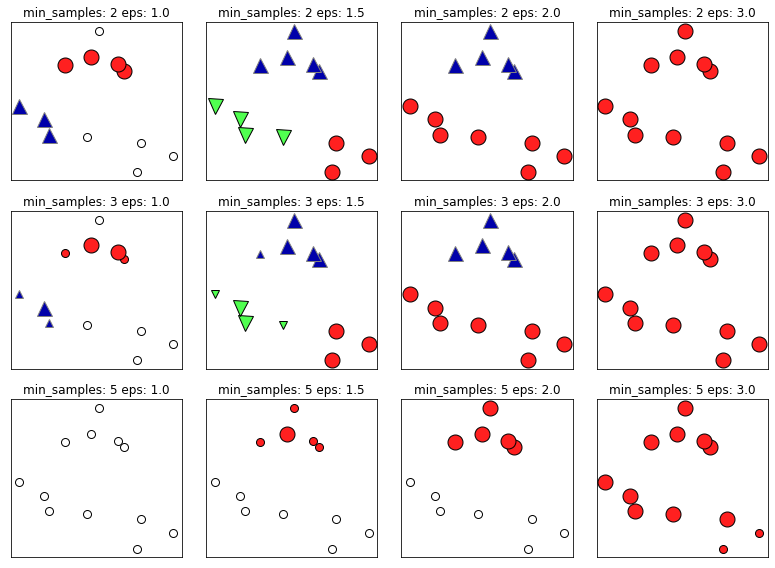

In [51]:
mglearn.plot_dbscan.plot_dbscan()

소문자 `dbscan`은 함수이고, 대문자 `DBSCAN`은 클래스 이다.  
클래스는 인스턴스하고 `fit_transform`하면 되기 때문에 다른 알고리즘처럼 쓸 수 있다.

In [1]:
from sklearn.cluster import DBSCAN, dbscan 

In [2]:
dbs = DBSCAN() # 하이퍼 파라미터는 default value 사용

In [11]:
dbs.fit_predict(iris) 

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

몇개로 나눴는지는 `unique`로 한번에 볼 수 있다. 데이터 많으면 일일히 확인할 수 없으므로 이 기법 알아야한다.

In [12]:
np.unique(dbs.fit_predict(iris))

array([-1,  0,  1], dtype=int64)

default가 가장 성능 좋다? 아니다.  
시행착오를 많이 해봐야한다.

In [13]:
dbs = DBSCAN(eps=2, min_samples=5)

In [14]:
dbs.fit_predict(iris)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
np.unique(dbs.fit_predict(iris))

array([0], dtype=int64)

In [18]:
dbs = DBSCAN(eps=1, min_samples=3)

In [19]:
dbs.fit_predict(iris)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [20]:
np.unique(dbs.fit_predict(iris))

array([0, 1], dtype=int64)

clustering할 때는 데이터의 분포 모양을 보고 몇 묶음을 만들 것인지 생각해야 한다.  
지도학습에서는 `pairplot`을 보고 라벨링된 target 묶음을 어떻게 분류할 지를 판단했지만 (linear or non-linear)  
비지도 학습에서는 `pairplot`을 보고 어떻게 묶을 수 있을지 생각해야 한다.

In [83]:
import seaborn as sns

`hue`가 없기 떄문에 그래프를 보고 분석하기가 어렵다. 

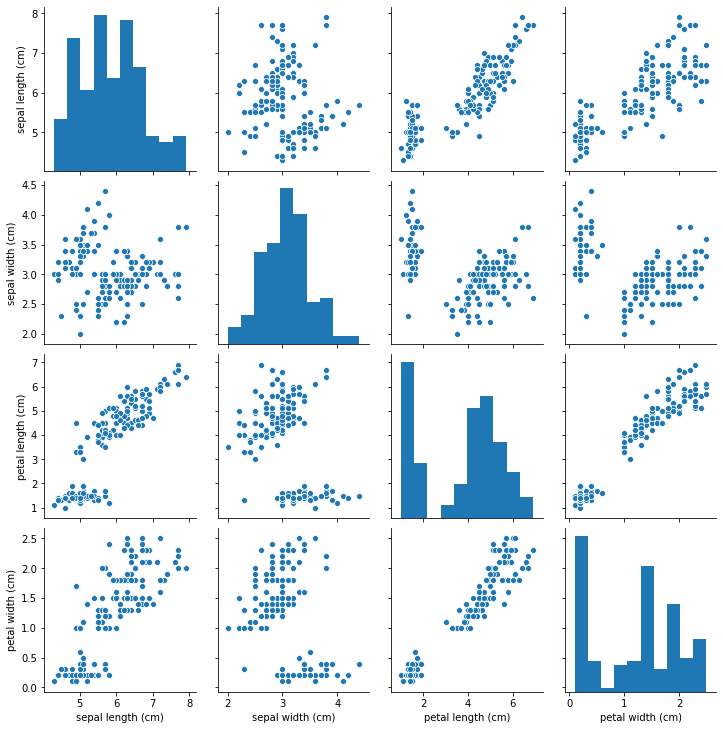

In [59]:
sns.pairplot(iris) 

보통 위 그래프를 보면 2개로 묶을 수 있다는 생각이 든다.  
하지만, "차원"을 생각해야 한다.  
그래프는 2차원 평면이기 때문에 함정에 빠지기 쉽다.

한 차원이라고 생각하면 분리되지만,  
예를 들어 3차원일때 x축으로 구분되고, y축으로 구분되고, z축으로 봐도 구분되면 2개 이상으로 나눠질지도 모른다.  

In [134]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 15, 16, 17, 18])
z = np.array([1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1])

temp = np.stack([x,y,z], axis=1)
temp = pd.DataFrame(temp, columns=["x", "y", "z"])

예를 들어, 이 임의의 데이터는 각 차원 하나만 놓고 생각하면 2개로 분리되지만,  

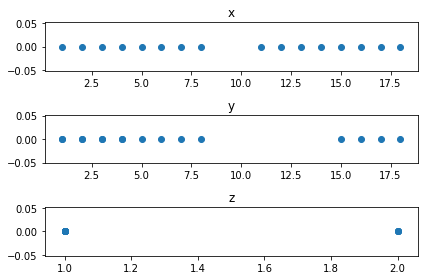

In [136]:
plt.subplot(311)
plt.scatter(temp.x, np.zeros_like(temp.x))
plt.title("x")

plt.subplot(312)
plt.scatter(temp.y, np.zeros_like(temp.y))
plt.title("y")

plt.subplot(313)
plt.scatter(temp.z, np.zeros_like(temp.z))
plt.title("z")

plt.tight_layout()

2차원으로 보면 3개로 묶을 수도 있다.

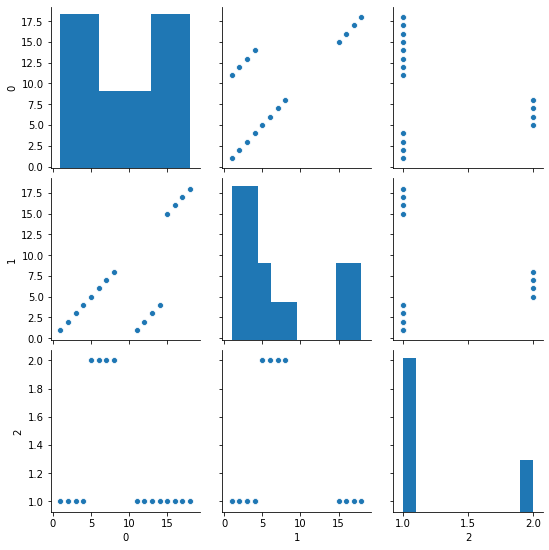

In [132]:
sns.pairplot(temp)

3차원으로 보면 4개로 묶을 수 있다.

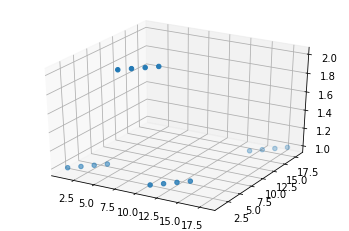

In [114]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(temp.x, temp.y, temp.z)

데이터를 어떻게 묶는 것이 좋은지는 모른다.
결국, 해봐야 안다. 

clustering 후에 `hue`를 써서 잘 분류되었는지 확인할 수 있다.

In [150]:
dbs = DBSCAN(eps=0.5, min_samples=5)

In [151]:
iris["target_dbscan"] = dbs.fit_predict(iris)

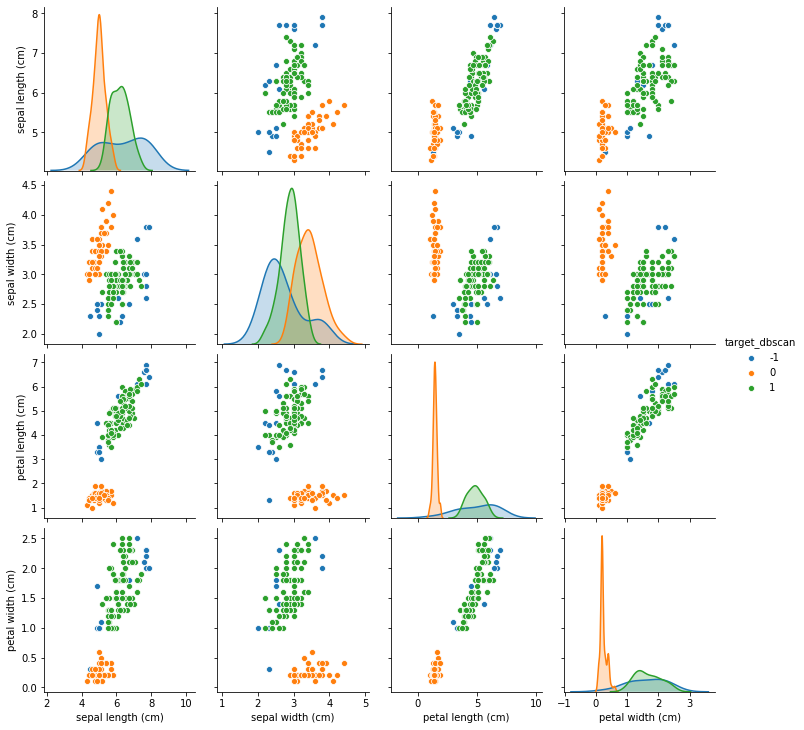

In [159]:
sns.pairplot(iris, hue="target_dbscan")

unsupervised는 딥러닝 이전에서는 큰 성공이 없었다. 

### KMeans

In [174]:
from sklearn.cluster import KMeans

In [152]:
kms = KMeans(3)

In [158]:
kms.fit_predict(iris.iloc[:, :-1])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

DataFrame에 추가한다.

In [160]:
iris["target_kmeans"] = kms.fit_predict(iris.iloc[:, :-1])

두 결과를 비교해서 라벨을 맞춰준다.

In [161]:
iris.target_kmeans.values # kmeans는 random_state를 지정하지 않으면 매번 달라지므로 재확인

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [162]:
iris.target_dbscan.values # 숫자

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [163]:
iris.target_kmeans = iris.target_kmeans.map({1:"A", 2:"B", 0:"C"})

In [164]:
iris.target_dbscan = iris.target_dbscan.map({0:"A", -1:"B", 1:"C"})

`array_equal`은 전체가 같은지 비교한다.

In [143]:
np.array_equal(iris.target_dbscan, iris.target_kmeans)

False

`equal`은 원소별로 같은지 비교한다.

In [165]:
np.equal(iris.target_dbscan, iris.target_kmeans)
# iris.target_dbscan == iris.target_kmeans       # 결과 같음

0       True
1       True
2       True
3       True
4       True
       ...  
145     True
146    False
147     True
148     True
149    False
Length: 150, dtype: bool

다른지 비교할 때는 `!=`를 사용한다.

In [166]:
iris.target_dbscan != iris.target_kmeans # 같지 않은 것

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146     True
147    False
148    False
149     True
Length: 150, dtype: bool

boolean indexing으로 예측이 다른 것만 뽑아보자.
A는 잘 맞췄는데, B와 C는 틀린게 많은 것 같다.

In [167]:
iris[iris.target_dbscan != iris.target_kmeans]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_dbscan,target_kmeans
41,4.5,2.3,1.3,0.3,B,A
50,7.0,3.2,4.7,1.4,C,B
51,6.4,3.2,4.5,1.5,C,B
53,5.5,2.3,4.0,1.3,C,B
54,6.5,2.8,4.6,1.5,C,B
...,...,...,...,...,...,...
135,7.7,3.0,6.1,2.3,B,C
138,6.0,3.0,4.8,1.8,C,B
142,5.8,2.7,5.1,1.9,C,B
146,6.3,2.5,5.0,1.9,C,B


실제 iris target과 비교해보자.  

In [168]:
iris["target_real"] = data.target

In [169]:
iris.target_real = iris.target_real.map({0:"A", 1:"B", 2:"C"})

In [172]:
# output에 DataFrame을 얼마나 보여줄 것인가 설정하는 옵션
pd.options.display.max_rows = 150

In [173]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_dbscan,target_kmeans,target_real
0,5.1,3.5,1.4,0.2,A,A,A
1,4.9,3.0,1.4,0.2,A,A,A
2,4.7,3.2,1.3,0.2,A,A,A
3,4.6,3.1,1.5,0.2,A,A,A
4,5.0,3.6,1.4,0.2,A,A,A
5,5.4,3.9,1.7,0.4,A,A,A
6,4.6,3.4,1.4,0.3,A,A,A
7,5.0,3.4,1.5,0.2,A,A,A
8,4.4,2.9,1.4,0.2,A,A,A
9,4.9,3.1,1.5,0.1,A,A,A


### Agglomerative Clustering(병합 군집화)

다른 표현으로, hierachical clustering(계층적 군집화)라고도 한다.

작은 컷부터 키워나가는 방식을 agglomerative라고 한다.  
이 알고리즘은 밑에서부터 뭉쳐서 올라간다.

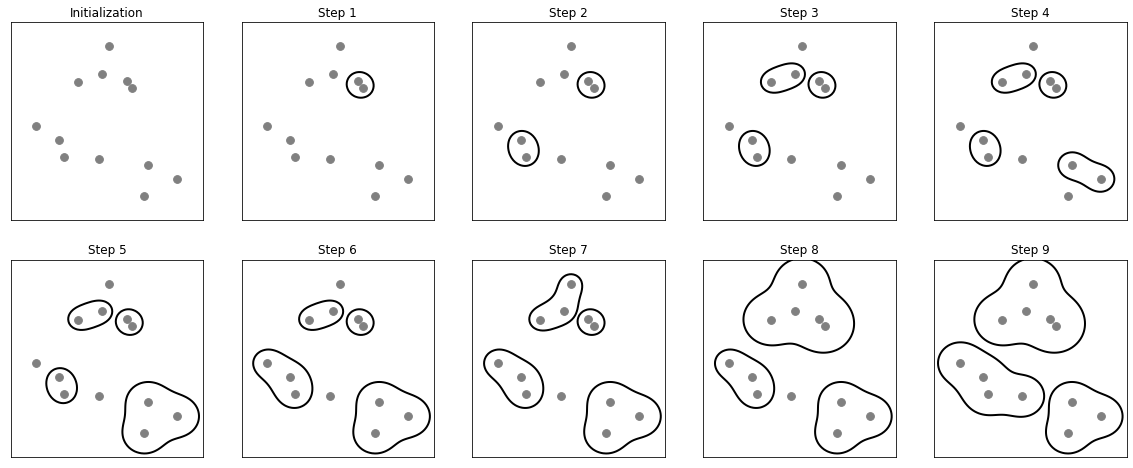

In [111]:
mglearn.plot_agglomerative.plot_agglomerative_algorithm()

In [175]:
from sklearn.cluster import AgglomerativeClustering

In [109]:
agm = AgglomerativeClustering(n_clusters=3)

In [110]:
agm.fit_predict(iris.iloc[:,:4])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

#### Dendrogram

dendrogram은 계층적 군집 분석을 시각화한 다이어그램이다.

scikit-learn은 dendrogram을 지원하지 않는다.  
numpy 기반의 과학 라이브러리 scipy를 이용해서 dendrogram을 그릴 수 있다.

In [177]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [178]:
temp = linkage(iris.iloc[:,:4])

In [179]:
temp

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+01, 1.52000000e+02, 1.41421356e-01, 3.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.56000000e+02, 1.57000000e+02, 1.41421356e-01, 5.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e

scipy가 scikit-learn 보다 유일하게 나은 점: dendrogram을 그려준다.  
아래에서부터 거리가 가까운 데이터끼리 묶어나가면서 위로 올라간다.  
최종 적으로는 1개의 군집이 된다.

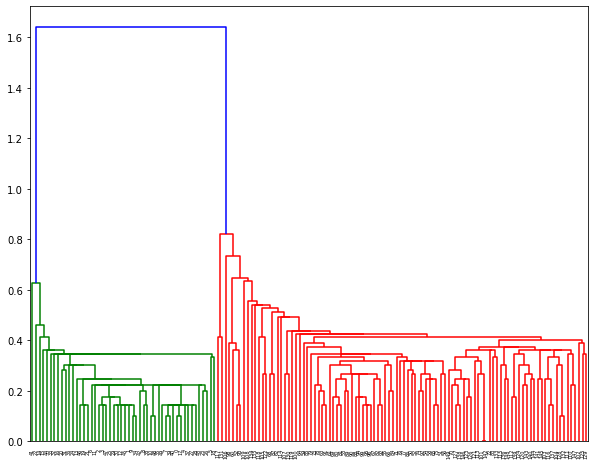

In [181]:
plt.figure(figsize=(10, 8))
pp = dendrogram(temp)

계층적 군집화 분석은 어느 단계에서 합치는 것을 종료하느냐에 따라서 n개의 클러스터로 나눈다.  
다음 그림 위치에서 합치는 것을 멈추면 3개의 군집이 된다.

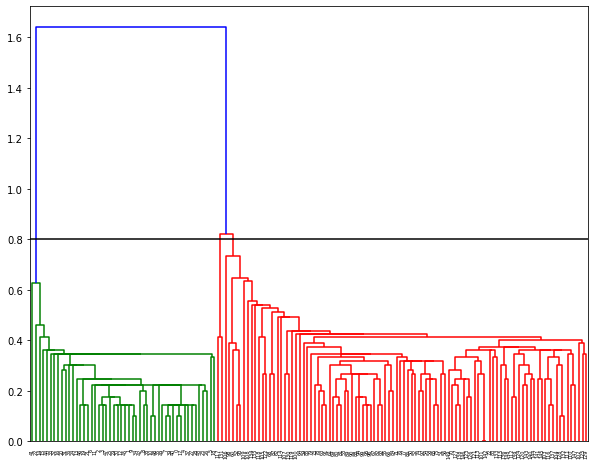

In [199]:
plt.figure(figsize=(10, 8))
pp = dendrogram(temp)
plt.hlines(0.8, 0, 100000)

다음과 같이 잘라내면 7개로 묶을 수 있다.

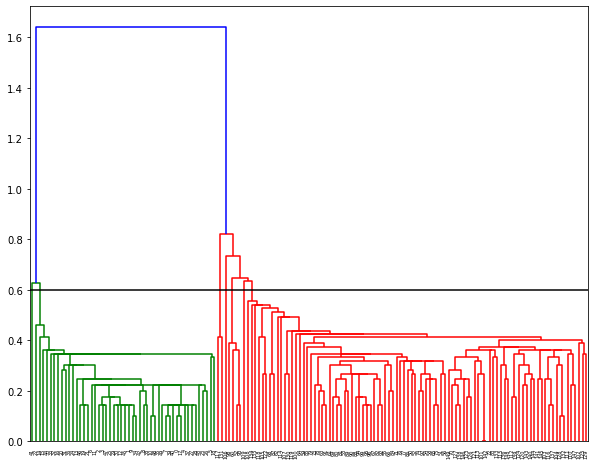

In [201]:
plt.figure(figsize=(10, 8))
dendrogram(temp)
plt.hlines(0.6, 0, 100000)
plt.show()

### PCA (Principle Component Analysis)

PCA(Principle Component Analysis, 주성분분석)은 차원을 줄이는 알고리즘이다.  

data를 새로 불러오자.  
fetch_califonia_housing은 실수로 불러왔다.  
fetch라는 이름이 붙으면 연습용 데이터인데 양이 많아서 다운로드 받아야 하는 데이터셋이다.

In [211]:
from sklearn.datasets import fetch_california_housing, fetch_20newsgroups

In [213]:
# 최초에 실행하면 다운로드 진행상태가 뜬다.
data = fetch_california_housing()

In [132]:
dir(data) # target name이 없으면 regression

['DESCR', 'data', 'feature_names', 'target']

In [134]:
ch = pd.DataFrame(data.data, columns=data.feature_names)

pca 실습을 위해서 wine 데이터셋을 준비하자.

In [219]:
from sklearn.datasets import load_wine

In [220]:
data = load_wine()

In [221]:
data_ = pd.DataFrame(data.data, columns=data.feature_names)

In [222]:
data_t = pd.DataFrame(data.target, columns=["target"])

In [223]:
wine = pd.concat([data_, data_t], axis=1)

feature 컬럼 13개, 데이터가 178개 있다. 데이터에 비해서 컬럼이 많다.  
(iris는 4개에 150개였다.)

In [141]:
wine.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null int32
dtypes: float64(13), int32(1)
memory usage: 18.9 KB


먼저, pca는 데이터의 분포를 가장 잘 나타낼 수 있는 축(component)을 찾는다.  
그리고 해당 축으로 데이터를 사영(projection) 시킨다. (사영: 빛을 비췄을 때 그림자가 생기는 것과 같음)  
데이터는 주성분 축으로 사영시켰을 때 분산이 가장 크다. (분산이 클 때 전체데이터를 가장 잘 설명한다.)  

다음으로, 첫번째 주성분 축과 직교하면서 데이터를 가장 잘 나타내는(사영했을 때 분산이 큰) 축이 두번째 주성분이다.  
각 주성분으로 사영시켜 저차원으로 변환한 데이터는 원래의 데이터를 잘 나타낸다.  

pca는 답은 없는데 데이터만 보고 판단하므로 unsupervised learning이다.

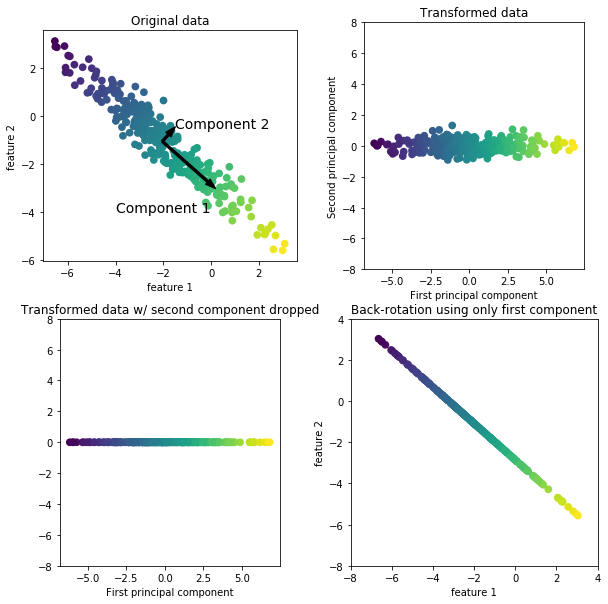

In [142]:
mglearn.plot_pca.plot_pca_illustration()

PCA를 하기 전의 성능을 보자.

In [230]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [225]:
cross_val_score(KNeighborsClassifier(), wine.iloc[:, :-1], wine.iloc[:, -1], cv=10)

array([0.66666667, 0.66666667, 0.61111111, 0.61111111, 0.61111111,
       0.61111111, 0.72222222, 0.66666667, 0.82352941, 0.76470588])

PCA는 데이터를 저차원으로 분해시키는 개념이므로 decopmosition 모듈에 위치한다.

In [226]:
from sklearn.decomposition import PCA

`n_components` : 몇 차원으로 줄일 지는 정해줘야한다. 

In [260]:
pc = PCA(4) # 차원 4개로 줄임

In [261]:
pc.fit_transform(wine.iloc[:, :-1]) # unspuervised learning은 y값 안 넣는다.

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00,
        -2.50113758e-01],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00,
        -8.64034749e-01],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00,
         9.12410681e-01],
       [ 7.33240139e+02,  1.92729032e-01, -9.17257016e-01,
        -5.41250645e-01],
       [-1.15714285e+01,  1.84899946e+01, -5.54422076e-01,
         1.36089609e+00],
       [ 7.03231192e+02, -3.32158674e-01,  9.49375334e-01,
        -3.59993827e-01],
       [ 5.42971581e+02, -1.35189666e+01,  2.12694283e+00,
         5.55661430e-02],
       [ 5.48401860e+02,  1.14494324e+01,  4.04924202e-02,
         1.34945380e+00],
       [ 2.98036863e+02, -8.18015784e+00,  3.88097517e+00,
        -9.10643037e-01],
       [ 2.98049553e+02, -7.10154294e+00,  1.55845533e+00,
        -1.67704202e+00],
       [ 7.63079712e+02, -8.33431723e+00, -1.88629037e+00,
         1.59831835e+00],
       [ 5.32943228e+02, -1.42876338e+01,  1.30335240e-01,
      

In [262]:
X = pc.fit_transform(wine.iloc[:, :-1])

In [263]:
cross_val_score(KNeighborsClassifier(), X, wine.iloc[:, -1], cv=10)

array([0.66666667, 0.66666667, 0.61111111, 0.61111111, 0.61111111,
       0.61111111, 0.72222222, 0.66666667, 0.82352941, 0.76470588])

feature가 13개에서 4개로 차원은 줄었는데 성능은 안 줄어들었다.

iris 데이터로도 해보자.

In [290]:
data = load_iris()
pc = PCA(2)
X = pc.fit_transform(data.data)

In [291]:
# Before
cross_val_score(KNeighborsClassifier(), data.data, data.target, cv=10)

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [292]:
# After
cross_val_score(KNeighborsClassifier(), X, data.target, cv=10)

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 0.93333333, 1.        , 1.        ])

PCA로 차원이 줄어든 것을 시각화 해보자.

In [270]:
import matplotlib.pyplot as plt

In [274]:
a = pd.DataFrame(X, columns=["component1", "component2"])

데이터 자체로만 계산해서 변형을 시켰더니 이런 데이터가 나왔다.  


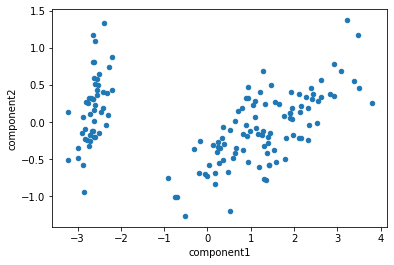

In [278]:
a.plot.scatter("component1", "component2")

대략 다음 빨간 선처럼 선형으로 분리할 수 있을 것 같다.  

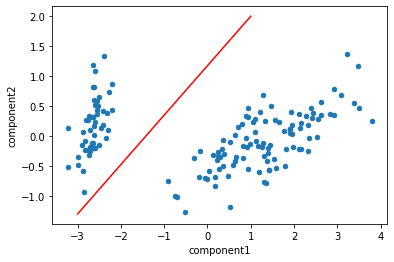

In [276]:
a.plot.scatter("component1", "component2")
plt.plot([-3, 1], [-1.3, 2], color="red")

2차원으로 줄이는게 좋을지 3차원으로 줄이는 게 좋을지 확답할 수 없다. 

**PCA 정리**: 
- 차원이 줄어든다.
    - 차원이 클수록 가지는 의미가 많다.
    - 차원을 줄일수록 필요없는 feature가 압축되는 경향이 있다.
    - 너무 줄이면 오버피팅이 생긴다.
- 원래 가진 의미를 잃어린다. 
    - 데이터를 잘 나타내는 값으로 바뀐다.
    - feature selection은 feature의 고유의미가 있지만, pca는 원래 feature의 영향을 알 수 없다.
    - 해석이 불가능해진다.
- 잘되는 데이터가 있고, 그대로인 데이터가 있다.
- 실무에서는 별로다.
    - PCA로 만든 모델은 실제 사용할 때도 전처리로 pca를 해야한다. 
    - 차원을 줄이는 LDA라는 걸 쓴다.
- PCA란 기법이 있다는 것 정도 알고 있자.

참고: Supervised 방식으로 차원을 줄이는 LDA

In [239]:
from sklearn.decomposition import LatentDirichletAllocation

In [247]:
lda = LatentDirichletAllocation(n_components=4)

In [273]:
lda.fit_transform(wine.iloc[:, :-1], wine.iloc[:, -1]) # => y값 필요, supervised로 차원을 줄여준다.

array([[2.01493527e-04, 2.01493536e-04, 2.01493536e-04, 9.99395519e-01],
       [2.09985876e-04, 2.09985891e-04, 2.09985890e-04, 9.99370042e-01],
       [1.86933856e-04, 1.86933867e-04, 1.86933865e-04, 9.99439198e-01],
       [1.51897661e-04, 1.51897675e-04, 1.51897673e-04, 9.99544307e-01],
       [2.76371604e-04, 2.76371596e-04, 2.76371600e-04, 9.99170885e-01],
       [1.55201614e-04, 1.55201629e-04, 1.55201627e-04, 9.99534395e-01],
       [1.74523572e-04, 1.74523587e-04, 1.74523585e-04, 9.99476429e-01],
       [1.70680513e-04, 1.70680527e-04, 1.70680525e-04, 9.99487958e-01],
       [2.10443435e-04, 2.10443447e-04, 2.10443446e-04, 9.99368670e-01],
       [2.09651360e-04, 2.09651371e-04, 2.09651370e-04, 9.99371046e-01],
       [1.50048189e-04, 1.50048203e-04, 1.50048201e-04, 9.99549855e-01],
       [1.75871343e-04, 1.75871360e-04, 1.75871358e-04, 9.99472386e-01],
       [1.71696941e-04, 1.71696957e-04, 1.71696955e-04, 9.99484909e-01],
       [1.94363218e-04, 1.94363229e-04, 1.94363227e

### t-sne

scikit-learn이 업데이트하면서 `t_sne`를 사용할 수 없게 되었다.  
t-sne는 딥러닝에서 많이 쓰는 기법이므로, 나중에 다시 배울 예정이다.

In [179]:
from sklearn.manifold import t_sne

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.manifold.t_sne module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)


---

unsupervised learning은 일반적인 기계학습에서는 별로 도움이 안되는데 딥러닝에서는 도움이 많이 된다.

---

## Deep Learning의 역사

1957년, Frank Rosenblatt(프랭크 로젠블랫)이 뇌의 뉴런을 모방한 알고리즘, Perceptron(퍼셉트론)을 만들었다.  
퍼셉트론은 AND 문제와 OR 문제를 해결할 수 있는 알고리즘으로 큰 인기를 끌었다.  
지금보면 별 것 아니지만 당시에는 기계가 스스로 해결할 수 있다는 것에 열광했다(학자들이)

> AND문제: 둘다 불이 켜지면 1, 하나라도 꺼지면 0
> 
>|$X_1$|$X_2$|AND|
|:---:|:---:|:---:|
|0|0|0|
|1|0|0|
|0|1|0|
|1|1|1|
>
> AND를 나타내는 수학적 모델은 $y = 0.4x_1 + 0.4x_2  - 0.5$ $(\text{if} \space y > 0,\space 1 \space \text{else} \space 0)$ 로 하면 해결 가능

>OR문제: 하나라도 불이 켜지면 1, 둘다 꺼지면 0
>
>|$X_1$|$X_2$|OR|
|:---:|:---:|:---:|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|1|
>
> OR를 나타내는 수학적 모델은 $y = 0.4x_1 + 0.4x_2  - 0.3$ $(\text{if} \space y > 0,\space 1 \space \text{else} \space 0)$ 로 하면 해결 가능

Perceptron의 구조를 보면 수학적으로 1차식과 같다.  
수학적으로 1차식과 같기때문에 선형으로는 해결할 수 없는 태생적 한계가 있다.  

1969년, 기호주의 인공지능 연구자 Marvin Minsky(마빈 민스키)가 XOR은 해결할 수 없는 한계를 수학적으로 증명하였다.  
또한 perceptron 여러개를 이용해서 XOR 문제를 해결할 수는 있지만, 너무 복잡해서 이를 학습시킬 방법이 없다고 밝혔다.  
당시에는 기호주의와 연결주의 사이에 헤게모니 싸움이 심한 시절이었다.  
거액의 연구비가 달려있는 문제였기 때문에 새로운 논문이 나오면 서로 상대 진영을 공격했다.  

Perceptron을 옹호하던 연결주의 인공지능에 1차 AI 겨울이 도래한다.

> XOR문제: 하나라도 불이 켜지면 1, 둘다 켜지면 0
>
> |$X_1$|$X_2$|XOR|
|:---:|:---:|:---:|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|0|
>


perceptron 알고리즘은 scikit-learn의 `linear_model`모듈에 있다.  
linear 모델이기 때문에 복잡한 문제는 해결하지 못한다.

In [180]:
from sklearn.linear_model import Perceptron

In [ ]:
per = Perceptron()

1986년 Geoffrey Hinton(제프리 힌튼)이 Perceptron을 여러개 쌓은 알고리즘을 학습시킬 방법으로 Backpropagation을 발표한다.  
perceptron을 여러개 쌓았다고 해서 Multi Layer Perceptron(MLP, 다층 퍼셉트론)이라고 한다.  
성능이 더 좋아져 어려운 문제도 해결할 수 있게 되었다.  
이때부터 neural network라고 불리며 전성기를 다시 맞이했다.  
실패한 이미지를 벗어나기 위해 이름을 바꿔서 MLP보다는 Neural Network라는 이름으로 리브랜딩했다.

레이어를 쌓음으로써 선형 알고리즘에서 비선형 알고리즘으로 바뀌었다.  
scikit-learn에서도 `linear_model`이 아니라 `neural_network`에 있다.  

In [281]:
from sklearn.neural_network import MLPClassifier

In [282]:
mlp = MLPClassifier()

MLP는 레이어가 많아지면 오버피팅되는 문제와 학습이 안되는 문제가 발견되었다.  
다시 AI 겨울이 찾아온다.

2006년 딥러닝의 시초가 탄생한다.  
Geoffrey Hinton이 레이어를 깊게 쌓아도 학습되고 오버피팅 안되는 해결책을 가져왔다.  
힌튼은 딥러닝 알고리즘으로 2012년 ILSVRC(이미지넷 이미지 인식 대회)에서 압도적인 성능을 우승한다.